# ELG7186 - Winter 2022 - Assignment 1
## Due: <strong>Sunday February 6<sup>th</sup> 2022 -- 11:59pm</strong>

The purpose of this assignment is to gain some experience working with the tools you will use throughout the course. You will learn:
- The basics of data loading and preparation
- Classification using the k-NN algorithm
- Classification using a Support Vector Machine (SVM)
- Calculation of metrics to assess the performance of your model

### Submission Details
Submit your Jupyter notebook .ipynb file using Brightspace. Do not include any other files or images as they will not be reviewed.
<p>
<strong>Make certain that you run all the cells in the notebook you will submit</strong> or you will loose marks.
</p>
<ul>
<li>You can submit multiple times, but only the most recent submission will be saved</li>
<li>Do not wait until the last minute to submit in case you have an unexpected issue</li>
<li>Review the late policy in the syllabus</li>
<li><strong>You must submit your own work</strong> and abide by the University of Ottawa policy on plagiarism and fraud</li>
</ul>


## Part 0. Dataset Preparation
To complete the assignment you will need to download the MNIST dataset and devise an appropriate training set split. You may acquire the dataset using the method of your choice. Note that some sources e.g. sklearn have reduced the samples to only 1797 (this could negatively affect your results). If you use the full dataset, you are free to sample from the dataset to reduce the overal training samples. The overall accuracy is less important than your  observations and comparisons. For example classifying the full 10,000 test images might take approximately 15 minutes using k-NN.

In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Divide the raw data into appropriate training and test sets for both the images and corresponding labels for use with the subsequent parts of the assignment.</li>
<li>Visualize five samples of each class by plotting a grid using the matplotlib library.</li>
</ul>


In [70]:
# Prepare your dataset here and display samples here.
import os 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow import keras
from math import sqrt
import operator
import random 
import sklearn
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.preprocessing import StandardScaler

# from skimage import exposure
#import imutils
# from sklearn.model_selection import KFold, cross_val_score, train_test_split

# import operator 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score ,plot_confusion_matrix ,confusion_matrix ,classification_report
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay 


In [3]:
# load data from keras and split it to train and test 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

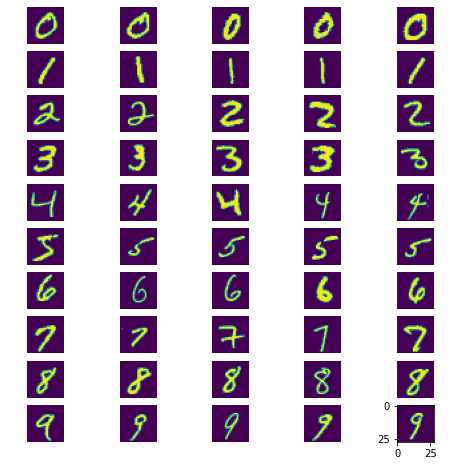

In [4]:
# create figure
fig = plt.figure(figsize=(8, 8))

# loop over images
number ={}
count=1
for i in range(10):
    number[i] = np.where(y_train ==i)[0][:5]
    for j in range(5):
        plt.axis("off")
        img = np.reshape(x_train[number[i][j]], (28, 28))
        fig.add_subplot(10, 5, count)
        count = count +1
        plt.imshow(img)


## Part 1. k-NN Classifier (2 Marks)
For this section you will implement a simple kNN Classifier on the MNIST dataset. To do this you will need to perform the following steps:
- Create a k-NN class. Your class must contain a method that returns predictions for your test set.
- Provide a suitable distance metric that you will use to calculate the nearest neightbours. You may choose the distance metric you believe is most suitable.
- Calculate the k nearest neighbours and make predictions.
- Choose the a value for _k_ that results in the highest accuracy on your test set. Show how you found this value.

When your classifier is working:
- Use sklearn to calculate accuracy and plot a confusion matrix using your predictions.
- Provide a brief discussion of your results

### Bonus:

When you compute the distance metric you can acheive better performance if you vectorize the computation instead of using for loops to iterate through the values. You can earn __0.5 bonus marks__ if you only need one loop, or __1 bonus mark__ if you can omit for loops for a fully vectorized distance calculation (a maximum of 1 bonus mark is available).




In [5]:
# from tqdm.notebook import trange, tqdm
train= []
test = []
#make flatten to inages 
for i in range(x_train.shape[0]) :
    train.append(x_train[i].flatten() ) 
    
for i in range(x_test.shape[0]) :
    test.append( x_test[i].flatten() )


In [68]:
trainSet = []
testSet = []
#prepare data to my class Knn to merge traindata with train lapels and test data with l
for i in range(len(train)):
    trainSet.append(np.append(train[i], y_train[i] ) )
for i in range(len(test)) :
    testSet.append( np.append(test[i], y_test[i] ) )

trainSet = random.sample(trainSet,7000)
testSet= random.sample(testSet,1000)
len(testSet)

1000

In [8]:
# class to calculate KNN 
class MyKNN :
  def __init__(self,K):
    self.K = K
    self.predictions=[] 
    self.trainsets=[]
    self.testsets=[]
    # generate predictions 
  def fit(self,trainset):
    self.trainsets =trainset
  def euclideanDist(self,image1, image2, length):
    distance = 0
    for x in range(length):
        distance += (image1[x] - image2[x])**2
    return sqrt(distance)
  # get k neighbors for a test image 
  def getNeighbors(self,train_set, test_row,k):
      distances = []
      length = len(test_row)-1
      for x in range(len(train_set)):
          dist = self.euclideanDist(test_row, train_set[x], length)
          distances.append((train_set[x], dist))
      distances.sort(key=operator.itemgetter(1))
      neighbors = []
      for x in range(k):
          neighbors.append(distances[x][0])
      return neighbors
  # git vote for all neighbors  
  def getVote(self,neighbors ):
      classVotes = {}
      for x in range(len(neighbors)):
          response = neighbors[x][-1]
          if response in classVotes:
              classVotes[response] += 1
          else:
              classVotes[response] = 1
      sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
      return sortedVotes[0][0]
  # give function test label and predections and give accuracy
  def Accuracy(self,testSet, predictions): 
      correct = 0 
      for x in range(len(testSet)): 
          if testSet[x][-1] == predictions[x]: 
              correct += 1 
      return (correct/float(len(testSet))) * 100.0 
  def getAccuracy(self,testset):
      accuracy = self.Accuracy(testset, self.predictions)
      return(accuracy)
  def predict(self,testset):
    for x in range(len(testset)): 
        neighbors = self.getNeighbors(self.trainsets, testset[x], self.K) 
        result = self.getVote(neighbors) 
        self.predictions.append(result) 
    return self.predictions
 

In [15]:
# call my class and give k == 3 with sample of data 10% 
knn= MyKNN(3) 
knn.fit(trainSet)
pred = knn.predict( testSet)
acc =  knn.getAccuracy( testSet)
print("the accuracy of k {0} = {1} ".format(3 , acc))
# the k apper in result =9999 becouse i give format i forgit give 3 so it appear 9999 but this result 

C:\Users\Sameh_pc\AppData\Local\Temp/ipykernel_14624/3127372431.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  distance += (image1[x] - image2[x])**2


the accuracy of k 9999 = 77.7 


In [71]:
knn= MyKNN(5) 
knn.fit(trainSet)
pred_k_5 = knn.predict( testSet)
acc =  knn.getAccuracy( testSet)
print("the accuracy of k {0} = {1} ".format(3 , acc))
# the k apper in result =3 becouse i give3 forgit give 5 so it appear 9999 but this result 

C:\Users\Sameh_pc\AppData\Local\Temp/ipykernel_3596/2448839152.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  distance += (image1[x] - image2[x])**2


the accuracy of k 3 = 79.80000000000001 


In [ ]:
predection =[]
acc_of_k = []
for i in trange(2,6):
    knn= MyKNN(i) 
    knn.fit(trainSet)\''
    predection.append( knn.predict( testSet))
    acc =knn.getAccuracy( testSet)
    acc_of_k.append(acc)

C:\Users\Sameh_pc\AppData\Local\Temp/ipykernel_14624/3127372431.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  distance += (image1[x] - image2[x])**2


the accuracy of k 2 = 53.0 
the accuracy of k 3 = 69.3 
the accuracy of k 4 = 72.39999999999999 


the accuracy of k 2 = 53.0 
the accuracy of k 3 = 69.3 
the accuracy of k 4 = 77.7 
the accuracy of k 5 = 79.8 
the classification report for the best accuracy for k = 5 is  
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        98
           1       0.47      1.00      0.64        83
           2       0.91      0.83      0.87        76
           3       0.94      0.70      0.80       105
           4       0.91      0.60      0.72       104
           5       0.93      0.61      0.74        88
           6       0.91      0.92      0.92       105
           7       0.90      0.84      0.87       117
           8       0.88      0.69      0.78       118
           9       0.68      0.84      0.75       106

    accuracy                           0.80      1000
   macro avg       0.84      0.80      0.80      1000
weighted avg       0.85      0.80      0.80      1000



<function matplotlib.pyplot.show(close=None, block=None)>

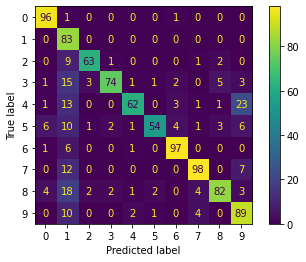

In [83]:
acc_of_k= [53.0  ,69.3 ,77.7 ,79.8]
y =[]
for i in range(len(testSet)):
    y.append(testSet[i][-1])
for (i,k) in enumerate(range(2,6)):
      print("the accuracy of k {0} = {1} ".format(k , acc_of_k[i]))

print ("the classification report for the best accuracy for k = 5 is  " )
print( classification_report(y,pred_k_5))
con_lap = range(10)
# plot the confustion matrix for best k predection 
con_mat = confusion_matrix(y, pred_k_5, labels=con_lap)
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat,   display_labels=con_lap)
disp.plot()
plt.show

## knn accuracy results 
- i change the k from 2 to 5 but my device stop during run so a apply k =5 only again 
- when apply the knn on 7000 trainning sample and 1000 test sample with k = 3 the accuracy = 77.7 % but when decrease the training data to 3000 sample the accuracy of the model decrease to 69.3  so that if the train data increased the accuracy of model increased, and incresed when increase the number of k  
- the best accuracy i got it when k = 5 the accurcy = 80 % and the precision  = 84 % and recall = 80% and this measure will increase if i try all data i use 10% of data to train and test model only 
- from result the precision of the digit number 1 it is very low in hand written the model predict wrong but the recall is 100% that main all predict that 1 is all correct but there many number is not 1 it  predict is 1
- But there are digit number  4  the recall is 64%  the model have many digit is 4 and he don’t predict or know it 


## Part 2. Logistic Regression (3 Marks)

For this section you will perform binary classification using logistic regression. Just as in Part 1. you will use the MNIST dataset, however to obtain a result for each class using logistic regression you will need to use a One-vs-Rest (OvR) approach to acheive multi-class classification. 

Using ```LogisticRegression()``` in sklearn, write a function to execute the OvR strategy for the MNIST classes. Do not use the built-in ```OneVsResClassifier()``` method. You will need to follow these basic steps:
- Train a binary classifier for each class, where the target class is a "positive" results and the combination of the remaining classes are "negative". For MNIST you will need 10 models.
- For each test sample compute the probabilities for each model
- Select the argmax of the probabilities to obtain the predicted class

Collect your predictions from the test set and compute the accuracy score and plot a confusion matrix.

In [105]:
#Write your logistic regression code here.

#convsrt all lapel in y train or y test to one label by (0) and other with (1) 
def convert(y):
  y1 =np.where(y_train == y,0,1) 
  y2 =np.where(y_test == y,0,1) 
  return y1 ,y2

# give the accuracy and probability for each class 
def logistic_regg(x1,y1,x2,y2):
  regg = LogisticRegression(random_state=0).fit(x1, y1)
  pred = regg.predict(x2)
  prob = regg.predict_proba(x2)
  Accuracy = accuracy_score(y2 , pred)
  return Accuracy ,prob

lapels =[]
for i in range(10):
  lapels.append(convert(i))
  

In [106]:

accuracys =[]
model_prob =[]
for i in range(10):
  acc ,prob =logistic_regg(train,lapels[i][0] ,test, lapels[i][1])
  accuracys.append(acc)
  model_prob.append(prob)


C:\Users\Sameh_pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sameh_pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

accuracy of class 0:versis other = 0.9922
accuracy of class 1:versis other = 0.9933
accuracy of class 2:versis other = 0.9802
accuracy of class 3:versis other = 0.9761
accuracy of class 4:versis other = 0.9834
accuracy of class 5:versis other = 0.9779
accuracy of class 6:versis other = 0.9846
accuracy of class 7:versis other = 0.9833
accuracy of class 8:versis other = 0.9464
accuracy of class 9:versis other = 0.963
argmax accuracy for coputation of all model by probabilty is =  0.9181
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.88      0.90      1032
           3       0.90      0.91      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.91      0.86      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.84

<function matplotlib.pyplot.show(close=None, block=None)>

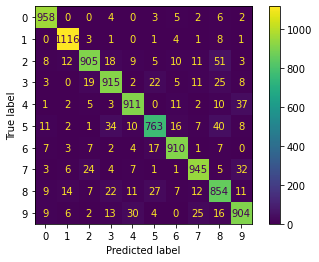

In [108]:

argmax_pred= np.argmax(model_prob, axis=0)
prediction =[]
for i in argmax_pred:
  prediction.append(i[0]) 

argmax_Accuracy = accuracy_score(y_test , prediction)
for i in range(10):
 print("accuracy of class {0}:versis other = {1}".format(i ,accuracys[i]))
print("argmax accuracy for coputation of all model by probabilty is = " ,argmax_Accuracy)

print (classification_report(y_test ,prediction))
# plot confusion matrix 
con_lap = range(10)
con_mat = confusion_matrix(y_test, prediction, labels=con_lap)
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat,   display_labels=con_lap)
disp.plot()
plt.show

## Part 3. Support Vector Machine (SVM) Classification (4 Marks)

In Part 3. you will use Scikit-learn to perform classification, again on the MNIST dataset. You can use the built in SVM library for classification. As with logistic regression, SVM is designed for binary classification. However, in this case Scikit-learn will handle the OvR models behind the scenes.

Your task is to compare different modes of the SVM and determine the best performer. 

Create an SVM baseline using the <code>LinearSVC()</code> function. Make sure to use the primal solution and use "ovr" for multiclass Calculate the accuracy score for comparison.

Next you will explore the effect of the cost parameter on the accuracy.
    <ul>
    <li>Run the classification with a range of C values For example: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]</li>
    <li>Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

Add a regularization term.
    <ul>
    <li>Rerun the above experiment, but this time use L1 regularization.</li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

For the final experiment you will use the ```SVC()``` function to run the classifer with a kernel.
    <ul>
    <li>Use a radial basis function when training a new model</li>
    <li>Find the optimal combination of values for the cost and gamma parameters. Use the following values in your loop:<br/>
        <div style="margin-left:40px"><code>
        for cost in [0.01, 0.1, 1, 10, 100]:<br/>
        &emsp;for gamma in [0.01, 0.1, 1, 10, 100]:
        </code></div>
    </li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>


Choose the model with the highest accuracy and plot the confusion matrix. In your discussion explain the results of your experiments and the reason for increased performance from the baseline (if any). Comment on the effect of the cost-paramenter and the L1 penalty on accuracy as well as any overfitting you observed. Discuss the confusion matrix of the model accuracy and provide some reasons for high-values found off the main diagonal.

### Bonus Mark
Instead of using raw pixel values compute an alternate feature representation for your dataset and re-run train the model. Compare the accuracy of the model using the new feature representation with the model trained with pixel values.

In [18]:
#prepare data in begining 


7000

In [58]:
xtrain_svm =train
ytrain_svm =y_train

xtest_svm = test
ytest_svm =y_test

### build the baseline model of SVM by linearsvc

In [59]:
# use SVM Model with Linear Kernel as baseline 
SVM1 = svm.LinearSVC()
SVM1.fit(xtrain_svm, ytrain_svm)
SVM1.decision_function_shape='ovr'
acc = SVM1.score(xtest_svm,ytest_svm)*100
print(' Model Accuracy : {:.2f}%'.format(acc))


 Model Accuracy : 84.19%


C:\Users\Sameh_pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### apply SVM with range of cost value 

In [60]:
# cost value that will give to model to mesure accuracy 
C =[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
accuracy_c =[]
for (i ,c) in enumerate(C) :
    clf = svm.LinearSVC(C= c )
    clf.fit(xtrain_svm ,ytrain_svm)
    clf.decision_function_shape='ovr'
    acc = clf.score(xtest_svm,ytest_svm)*100
    acc ="%.2f" % acc
    accuracy_c.append(acc)

C:\Users\Sameh_pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sameh_pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sameh_pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sameh_pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sameh_pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sameh_pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, in

the accuracy of 0.0001 = 90.85 %
the accuracy of 0.001 = 87.03 %
the accuracy of 0.01 = 87.28 %
the accuracy of 0.1 = 86.96 %
the accuracy of 1 = 82.34 %
the accuracy of 10 = 89.11 %
the accuracy of 100 = 80.59 %
the accuracy of 1000 = 87.54 %


<function matplotlib.pyplot.show(close=None, block=None)>

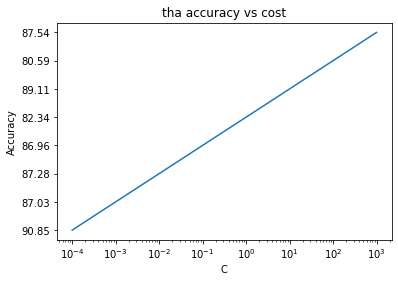

In [61]:
#plot the accuracy varsis C paramter
for (i ,c) in enumerate(C) :
    print("the accuracy of {0} = {1} %".format(c,accuracy_c[i]))
plt.plot(C,accuracy_c)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("tha accuracy vs cost")
plt.show

### get accuracy with range of Cost value and penalty =L1

In [63]:
# cost value that will give to model to mesure accuracy 
C =[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
accuracy_c_l =[]
clasifir_l1 =[]
for (i ,c) in enumerate(C) :
    clf = svm.LinearSVC(penalty = 'l1',dual =False ,C= c )
    clf.fit(xtrain_svm ,ytrain_svm)
    clasifir_l1.append(clf)
    acc = clf.score(xtest_svm,ytest_svm)*100
    acc ="%.2f" % acc
    accuracy_c_l.append(acc)

C:\Users\Sameh_pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sameh_pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sameh_pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Sameh_pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


the accuracy of 0.0001 = 91.23%
the accuracy of 0.001 = 91.94%
the accuracy of 0.01 = 91.81%
the accuracy of 0.1 = 91.74%
the accuracy of 1 = 91.65%
the accuracy of 10 = 91.60%
the accuracy of 100 = 91.60%
the accuracy of 1000 = 91.62%


<function matplotlib.pyplot.show(close=None, block=None)>

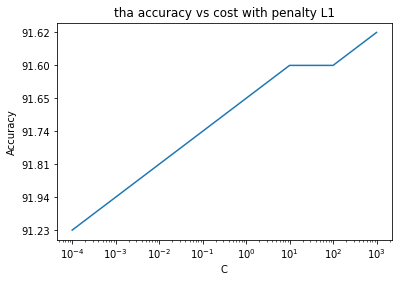

In [64]:
for (i ,c) in enumerate(C) :
    print("the accuracy of {0} = {1}%".format(c,accuracy_c_l[i]))
plt.plot(C , accuracy_c_l)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("tha accuracy vs cost with penalty L1")
plt.xscale("log")
plt.show


In [ ]:

clf =clasifir_l1[2]
pred =clf.predict(xtest_svm)
print (classification_report(ytest_svm ,pred))

### get 10% sample from data and make stander scale 

In [94]:
#prepare data in begining 
scaler = StandardScaler()
#select random sample 70000 training data and 1000 test data from all data 
random.seed(45)
x1_idex = random.sample(range(len(train )),7000)
x2_insex= random.sample(range(len(test )),1000)
xtrain_svm=[]
ytrain_svm=[]
for i in x1_idex :
    xtrain_svm.append(train[i])
    ytrain_svm.append(y_train[i])

xtest_svm=[]
ytest_svm =[]
for i in x2_insex : 
    xtest_svm.append(test[i])
    ytest_svm.append(y_test[i])
len(xtrain_svm)

7000

### get accuracy with range of Cost & Gamme

In [95]:
#kernel='rbf' 
xtrain_svm =scaler.fit_transform(xtrain_svm)
xtest_svm =scaler.fit_transform(xtest_svm)
cost =[0.01, 0.1, 1, 10, 100]
gama =[0.01, 0.1, 1, 10, 100]
accuracy_SVC=[]
clasifirs =[]
for i in cost :
    a =0
    for g in gama :
        clf = svm.SVC(kernel='rbf' ,C= i ,gamma =g)
        clf.fit(xtrain_svm ,ytrain_svm )
        clf.decision_function_shape='ovr'
        clasifirs.append(clf)
        acc = clf.score(xtest_svm,ytest_svm)
        if a < acc :
            a =acc
        print(" the C is ({}) and gamma is ({}) and Accuracy =  {:.2f}%".format( i, g, acc ) )
    accuracy_SVC.append([i ,a])

    

 the C is (0.01) and gamma is (0.01) and Accuracy =  0.23%
 the C is (0.01) and gamma is (0.1) and Accuracy =  0.12%
 the C is (0.01) and gamma is (1) and Accuracy =  0.12%
 the C is (0.01) and gamma is (10) and Accuracy =  0.12%
 the C is (0.01) and gamma is (100) and Accuracy =  0.12%
 the C is (0.1) and gamma is (0.01) and Accuracy =  0.37%
 the C is (0.1) and gamma is (0.1) and Accuracy =  0.12%
 the C is (0.1) and gamma is (1) and Accuracy =  0.12%
 the C is (0.1) and gamma is (10) and Accuracy =  0.12%
 the C is (0.1) and gamma is (100) and Accuracy =  0.12%
 the C is (1) and gamma is (0.01) and Accuracy =  0.75%
 the C is (1) and gamma is (0.1) and Accuracy =  0.19%
 the C is (1) and gamma is (1) and Accuracy =  0.12%
 the C is (1) and gamma is (10) and Accuracy =  0.12%
 the C is (1) and gamma is (100) and Accuracy =  0.12%
 the C is (10) and gamma is (0.01) and Accuracy =  0.77%
 the C is (10) and gamma is (0.1) and Accuracy =  0.19%
 the C is (10) and gamma is (1) and Accurac

the accuracy of C : 0.01 = 0.226%
the accuracy of C : 0.1 = 0.368%
the accuracy of C : 1 = 0.751%
the accuracy of C : 10 = 0.772%
the accuracy of C : 100 = 0.772%
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        80
           1       0.99      0.97      0.98       120
           2       0.34      1.00      0.51       109
           3       0.99      0.70      0.82       110
           4       0.95      0.70      0.80       105
           5       0.96      0.66      0.78        79
           6       1.00      0.61      0.76        85
           7       0.93      0.69      0.79       118
           8       0.96      0.75      0.84        97
           9       0.95      0.77      0.85        97

    accuracy                           0.77      1000
   macro avg       0.91      0.76      0.80      1000
weighted avg       0.90      0.77      0.80      1000

[[0.01, 0.226], [0.1, 0.368], [1, 0.751], [10, 0.772], [100, 0.772]]


<function matplotlib.pyplot.show(close=None, block=None)>

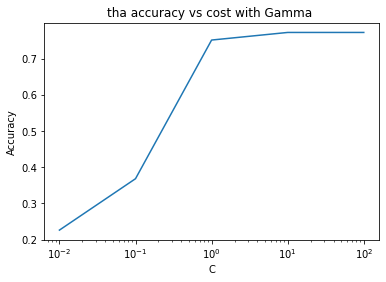

In [101]:
# get the best accuracy with change in C and print and plot 
acc =[]
for i  in range(len(cost)) :
    acc.append(accuracy_SVC[i][1])
    print("the accuracy of C : {0} = {1}%".format(accuracy_SVC[i][0],accuracy_SVC[i][1]))

#display the report for accuracy and recall and percision 
clf =clasifirs[15]
pred =clf.predict(xtest_svm)
print (classification_report(ytest_svm ,pred))
print(accuracy_SVC)
plt.plot(cost , acc)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("tha accuracy vs cost with Gamma ")
plt.xscale("log")
plt.show

### plot confusion matrix for best accuracy 

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.92      0.93      0.93       982
           5       0.91      0.85      0.88       892
           6       0.93      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.86      0.88      0.87       974
           9       0.89      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



<function matplotlib.pyplot.show(close=None, block=None)>

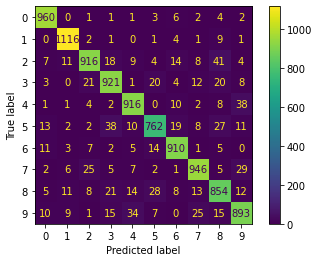

In [104]:
clf = svm.LinearSVC(penalty = 'l1',dual =False ,C= 0.001 )
clf.fit(train ,y_train)
pred = clf.predict(test)
print (classification_report(y_test ,pred)) 
con_lap = range(10)
con_mat = confusion_matrix(y_test, pred, labels=con_lap)
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat,display_labels=con_lap)
disp.plot()
plt.show

## conclusion 
- I apply linearSVC and give me the base accuracy 84.19% 
- and after give cost parameter to model the best accuracy we git is 90.85 % when the cost is 0.0001 .
- After that I apply penalty by regularization L1 to correct the faults the the best accuracy = 91.94%  when cost = 0.001.
- I tried to change the parameter that give the model I change the cost cost = [0.01, 0.1, 1, 10, 100] gama =[0.01, 0.1, 1, 10, 100] the best accuracy  0.77% that mean the accuracy decreased than baseline 
- the best accuracy I get from SVM is 91.94 i plot the confusion for it and it all digit the model predict and knoe it in the same dgree so the precision and recall are all most the same in all digits 


## Part 4. Write a Conclusion (1 Mark)

Write a conclusion comparing the results from each part of the assignment. Comment on the suitability of each method for this task.

### my Conclusion
- the knn             accuracy = 80    ,precision = 84 ,recall =80 and F1 score = 80
- logistic regression accuracy = 91.81 ,precision = 92 ,recall =92 and F1 score = 92
- SVM                 accuracy = 91.94 ,precision = 92 ,recall =92 and F1 score = 92
- as we see the accuracy of logistic regression and SVM as the same all most so i think the logistic regression is better becuase less that SVM in computational time. but the need more work to get the best compunation of paramter to do the task 
- and the knn can give good accuracy but need to train on all data to get high accuracy 


<!-- Write your conclusion here -->